<a href="https://colab.research.google.com/github/itrail/AMW_ML_Laboratorium/blob/main/lab10/lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# I/O-Bound Synchronous Version

import requests
import time


def download_site(url, session):
    with session.get(url) as response:
        print(f"Read {len(response.content)} from {url}")


def download_all_sites(sites):
    with requests.Session() as session:
        for url in sites:
            download_site(url, session)


if __name__ == "__main__":
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80
    start_time = time.time()
    download_all_sites(sites)
    duration = time.time() - start_time
    print(f"Pobrano {len(sites)} stron w {duration} sekund")

Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jyth

In [5]:
# I/O-Bound threading Version

import concurrent.futures
import requests
import threading
import time


thread_local = threading.local()


def get_session():
    if not hasattr(thread_local, "session"):
        thread_local.session = requests.Session()
    return thread_local.session


def download_site(url):
    session = get_session()
    with session.get(url) as response:
        print(f"Read {len(response.content)} from {url}")


def download_all_sites(sites):
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        executor.map(download_site, sites)


if __name__ == "__main__":
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80
    start_time = time.time()
    download_all_sites(sites)
    duration2 = time.time() - start_time
    print(f"Pobrano {len(sites)} stron w {duration2} sekund")

Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/diceRead 274 from http://olympus.realpython.org/dice

Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/diceRead 274 from http://olympus.realpython.org/dice

Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 274 from http://olympus.realpython.org/dice
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 274 from http://olympus.realpython.org/dice
Read 10394 from https://www.jython.org
Read 10394 from https://www.jython.org
Read 274 from

In [8]:
! pip install aiohttp

     |████████████████████████████████| 1.3MB 8.0MB/s 
     |████████████████████████████████| 143kB 23.1MB/s 
     |████████████████████████████████| 296kB 22.8MB/s 


In [9]:
# I/O-Bound asyncio Version

import asyncio
import time
import aiohttp
import nest_asyncio
nest_asyncio.apply()

async def download_site(session, url):
    async with session.get(url) as response:
        print("Read {0} from {1}".format(response.content_length, url))


async def download_all_sites(sites):
    async with aiohttp.ClientSession() as session:
        tasks = []
        for url in sites:
            task = asyncio.ensure_future(download_site(session, url))
            tasks.append(task)
        await asyncio.gather(*tasks, return_exceptions=True)


if __name__ == "__main__":
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80
    start_time = time.time()
    asyncio.get_event_loop().run_until_complete(download_all_sites(sites))
    duration3 = time.time() - start_time
    print(f"Pobrano {len(sites)} stron w {duration3} sekund")

Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 from https://www.jython.org
Read 3586 fr

In [10]:
# I/O-Bound multiprocessing Version

import requests
import multiprocessing
import time

session = None


def set_global_session():
    global session
    if not session:
        session = requests.Session()


def download_site(url):
    with session.get(url) as response:
        name = multiprocessing.current_process().name
        print(f"{name}:Read {len(response.content)} from {url}")


def download_all_sites(sites):
    with multiprocessing.Pool(initializer=set_global_session) as pool:
        pool.map(download_site, sites)


if __name__ == "__main__":
    sites = [
        "https://www.jython.org",
        "http://olympus.realpython.org/dice",
    ] * 80
    start_time = time.time()
    download_all_sites(sites)
    duration4 = time.time() - start_time
    print(f"Pobrano {len(sites)} stron w {duration4} sekund")

ForkPoolWorker-2:Read 10394 from https://www.jython.org
ForkPoolWorker-1:Read 10394 from https://www.jython.org
ForkPoolWorker-2:Read 274 from http://olympus.realpython.org/dice
ForkPoolWorker-1:Read 274 from http://olympus.realpython.org/dice
ForkPoolWorker-2:Read 10394 from https://www.jython.org
ForkPoolWorker-1:Read 10394 from https://www.jython.org
ForkPoolWorker-2:Read 274 from http://olympus.realpython.org/dice
ForkPoolWorker-1:Read 274 from http://olympus.realpython.org/dice
ForkPoolWorker-2:Read 10394 from https://www.jython.org
ForkPoolWorker-1:Read 10394 from https://www.jython.org
ForkPoolWorker-2:Read 274 from http://olympus.realpython.org/dice
ForkPoolWorker-1:Read 274 from http://olympus.realpython.org/dice
ForkPoolWorker-2:Read 10394 from https://www.jython.org
ForkPoolWorker-1:Read 10394 from https://www.jython.org
ForkPoolWorker-2:Read 274 from http://olympus.realpython.org/dice
ForkPoolWorker-1:Read 274 from http://olympus.realpython.org/dice
ForkPoolWorker-1:Read 10

In [11]:
# CPU-Bound Synchronous Version

import time


def cpu_bound(number):
    return sum(i * i for i in range(number))


def find_sums(numbers):
    for number in numbers:
        cpu_bound(number)


if __name__ == "__main__":
    numbers = [5_000_000 + x for x in range(20)]

    start_time = time.time()
    find_sums(numbers)
    duration5 = time.time() - start_time
    print(f"{duration5} sekund")

10.96094799041748 sekund


In [12]:
# CPU-Bound multiprocessing Version

import multiprocessing
import time


def cpu_bound(number):
    return sum(i * i for i in range(number))


def find_sums(numbers):
    with multiprocessing.Pool() as pool:
        pool.map(cpu_bound, numbers)


if __name__ == "__main__":
    numbers = [5_000_000 + x for x in range(20)]

    start_time = time.time()
    find_sums(numbers)
    duration6 = time.time() - start_time
    print(f"{duration6} sekund")

11.637257814407349 sekund


I/O-Bound synchronous: 6.4516 s
I/O-Bound threading: 1.4607 s
I/O-Bound asyncio: 0.4105 s
I/O-Bound multiprocessing: 3.7285 s
CPU-Bound synchronous: 10.9609 s
CPU-Bound multiprocessing: 11.6373 s


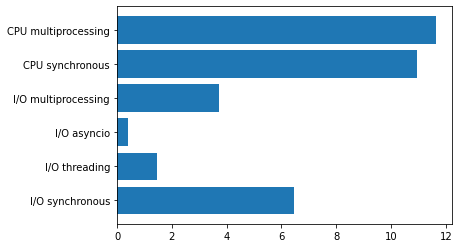

In [13]:
# Porównanie wyników

import matplotlib.pyplot as plt

print('I/O-Bound synchronous:', round(duration,4), 's')
print('I/O-Bound threading:',round(duration2,4), 's')
print('I/O-Bound asyncio:',round(duration3,4), 's')
print('I/O-Bound multiprocessing:',round(duration4,4), 's')
print('CPU-Bound synchronous:', round(duration5,4), 's')
print('CPU-Bound multiprocessing:', round(duration6,4), 's')

names = ['I/O synchronous', 'I/O threading', 'I/O asyncio', 'I/O multiprocessing', 'CPU synchronous', 'CPU multiprocessing']
values = [duration, duration2, duration3, duration4, duration5, duration6]

plt.barh(names, values)
plt.show()